# Prova Intermediária - Machine Learning

**Nome do aluno**: <font color='red'>LUCCA D OLIVEIRA GHETI KAO</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta - pode consultar suas anotações, a web, o que quiser, menos perguntar para outros ou para as AIs. Faça o seu trabalho de maneira ética!

ChatGPT para perguntas teóricas não é permitido. CoPilot para código é permitido.

## Instruções

Nesta prova vamos trabalhar com um dataset de tipos de florestamento de acordo com características do terreno e de suas cercanias.

As questões estão distribuidas ao longo do notebook, procure pela tag "**QUESTÕES**". Temos 7 questões ao todo.

Boa prova!

***

# **QUESTÕES**

***Questão 1*** (2,0 pt)

Em ciência devemos sempre tomar muito cuidado para não "overfittar" os fenômenos da natureza que estamos observando. Ou seja: devemos construir mecanismos de explicação (leis naturais) dos fenômenos que permitem reproduzir os resultados observados, e também permitem PREVER corretamente resultados para novas situações.

Nesta questão você deverá relacionar seu conhecimento de *machine learning* a este panorama da ciência.

a) (0.5 pts) Um cientista verifica que a lei natural que ela/ele postulou se ajusta muito bem ao conjunto completo de dados do seu experimento, e já declara que sua teoria é válida. Um especialista em machine learning diz que o cientista não pode afirmar isso ainda. Por que o especialista em machine learning diz isso? Explique. Construa uma sugestão que o especialista em machine learning pode fazer ao cientista para ajudá-lo a ter mais certeza sobre a validade de sua lei natural.

c) (0.5 pts) A qual etapa do processo "CRISP-DM" corresponde o "brainstorming" sobre boas ideias sobre leis naturais que possam explicar o experimento?

d) (0.5 pts) A qual etapa do processo de machine learning (nivel 2 / nivel 1 / nivel 0) corresponde o processo de escolher uma lei natural dentre um conjunto de opções de leis inventadas no item anterior?

e) (0.5 pts) Em ciência, o que é o "deploy"?

***Resposta***:



A: O cientista não pode afirmar com certeza que sua lei (modelo), é válido pois ele pode estar cometendo o erro conhecido como overfitting que seria, em outras palavras, o fenômeno de o modelo, lei ou regra de predição/categorização encontrado pelo cientista estar se sobreajustando aos dados que você está utilizando no experimento, criando uma falsa impressão de que seu modelo é perfeito para a resolução do problema. Uma sugestão para o cientista e que irá ajudá-lo, é separar seu conjunto de dados em treino e teste, para que ele possa testar suas ideias/hipóteses no conjunto de treino e testar o modelo final no conjunto de teste.

B: A etapa que corresponde a busca por leis naturais que possam explicar o experimento é a "Business Understading e Data Understading" onde o business expert e o data expert aprendem um com o outro, e juntos criam ideias de como podem buscar explicar a problematica em questão no ciclo de análise.

C: A etapa de escolher a lei natural é o nível 2, onde serão testadas todas as leis "brainstormadas" na etapa anterior do CRISP-DM, e com o teste e comparação do desempenho de todas essas ideias, uma ideia será escolhida e melhor explorada pelo cientista no próximo passo do processo.

D: Deploy é o processo de implantação da estrutura construída em produção, seja ela uma teoria acadêmica ou um modelo de machine learning.

***

Para as questões a seguir vamos trabalhar com o *dataset* *"Forest Cover Types"* (https://archive.ics.uci.edu/dataset/31/covertype). O *dataset* contém as seguintes *features*, de acordo com a documentação do *site*:

| Name                               | Data Type    | Measurement                 | Description                                   |
|------------------------------------|--------------|-----------------------------|-----------------------------------------------|
| Elevation                          | quantitative | meters                      | Elevation in meters                           |
| Aspect                             | quantitative | azimuth                     | Aspect in degrees azimuth                     |
| Slope                              | quantitative | degrees                     | Slope in degrees                              |
| Horizontal_Distance_To_Hydrology   | quantitative | meters                      | Horz Dist to nearest surface water features   |
| Vertical_Distance_To_Hydrology     | quantitative | meters                      | Vert Dist to nearest surface water features   |
| Horizontal_Distance_To_Roadways    | quantitative | meters                      | Horz Dist to nearest roadway                  |
| Hillshade_9am                      | quantitative | 0 to 255 index              | Hillshade index at 9am, summer solstice       |
| Hillshade_Noon                     | quantitative | 0 to 255 index              | Hillshade index at noon, summer soltice       |
| Hillshade_3pm                      | quantitative | 0 to 255 index              | Hillshade index at 3pm, summer solstice       |
| Horizontal_Distance_To_Fire_Points | quantitative | meters                      | Horz Dist to nearest wildfire ignition points |
| Wilderness_Area (4 binary columns) | qualitative  | 0 (absence) or 1 (presence) | Wilderness area designation                   |
| Soil_Type (40 binary columns)      | qualitative  | 0 (absence) or 1 (presence) | Soil Type designation                         |
| Cover_Type (7 types)               | integer      | 1 to 7                      | Forest Cover Type designation                 |

No *dataset* original, as colunas cujo nome inicia com `Wilderness_Area`, `Soil_Type` e `Cover_Type` são colunas binárias, pois já correspondem ao "one-hot-encoding" das características subjacentes. As demais colunas são quantitativas (numéricas).

No código do arquivo `utils.py` já temos a leitura do *dataset* e a separação treino-teste. Estes códigos utilitários estão em um arquivo separado apenas para não poluir este notebook, só isso.

Na leitura de dados as colunas binárias foram convertidas de volta para variáveis categóricas.

A análise exploratória também foi (muito mal) feita, mas é a vida: nem sempre temos bons colaboradores entregando material de qualidade para a gente continuar o trabalho, ora!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import (analise_descritiva_preliminar, load_dataset, split_data,
                   visualizacao_posterior, visualizacao_preliminar)

In [2]:
data = load_dataset()
train_data, test_data = split_data(data)

In [ ]:
# Descomente as linhas seguintes para ver a análise exploratória, ou
# descomente apenas as partes de seu interesse.

# analise_descritiva_preliminar(data)
# visualizacao_preliminar(data)
# visualizacao_posterior(train_data)

In [3]:
X_train = train_data.drop(columns=['Cover_Type'])
y_train = train_data['Cover_Type']

X_test = test_data.drop(columns=['Cover_Type'])
y_test = test_data['Cover_Type']

***

# **QUESTÕES**

***Questão 2*** (0.5 pts):

Este dataset é muito grande! Crie um dataset `X_train_small`, `y_train_small` a partir do dataset `X_train`, `y_train` com apenas 20% dos dados.

***Resposta***:

In [4]:
from sklearn.model_selection import train_test_split

X_train_small = train_test_split(X_train, train_size=0.2, random_state=42)[0]
y_train_small = y_train.loc[X_train_small.index]

***

# **QUESTÕES**

***Questão 3*** (1.0 pt):

Construa uma pipeline preditiva que contém os seguintes passos:

- **preprocessamento**:

    - **variáveis numéricas**:

        - `SimpleImputer(strategy='mean')`

        - `StandardScaler()`

    - **variáveis categóricas**:

        - `SimpleImputer(strategy='most_frequent')`

        - `OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')`

- **classificador**:

    - `HistGradientBoostingClassifier(random_state=42)`

***Resposta***:

In [5]:
from sklearn.compose import ColumnTransformer # Classe utilizada para aplicar transformações diferentes em colunas diferentes
from sklearn.impute import SimpleImputer # Classe utilizada para preencher valores faltantes
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline # Classe utilizada para encadear transformações
from sklearn.preprocessing import OneHotEncoder # Classe utilizada para codificar variáveis categóricas, aplicado com drop='first' para evitar a multicolinearidade
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


num_cols = X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(include='category').columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder',
        OneHotEncoder(
            handle_unknown='ignore',
            drop='first',
            sparse_output=False,
        )),
])

preprocessing = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols),
],)

modelo = HistGradientBoostingClassifier(random_state=42)

model = Pipeline([
    ('preprocessing', preprocessing),
    ('model', modelo),
])


***

# **QUESTÕES**

***Questão 4*** (1.0 pt):

Use `GridSearchCV` para executar a seleção de hiperparâmetros para o modelo acima, juntamente com a comparação com dois outros modelos:

- O modelo *trivial*: `DummyClassifier(strategy='most_frequent')`

- O modelo *simples*: `SGDClassifier(random_state=42, alpha=0.001)`

Para o modelo trivial e o modelo simples não faremos seleção de hiperparâmetros (mas em um caso real deveríamos fazer sim).

Para o modelo `HistGradientBoostingClassifier` faça a seleção de hiperparâmetros com as seguintes opções:

- Para o hiperparâmetro `max_iter` do classificador, teste as opções `[10, 100, 200]`

- Para o hiperparâmetro `max_depth` do classificador, teste as opções `[10, 20, None]`

***Resposta***:

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier

dummy_model = DummyClassifier(strategy='most_frequent')
sdg_model = SGDClassifier(random_state=42, alpha=0.001)

models = {
    'dummy': {
        'model': dummy_model,
    },
    'sdg': {
        'model': sdg_model,
    },
    'my_model': {
        'model': model,
    },
}

param_grid = {
    "model__max_iter": [10, 100, 200],
    "model__max_depth": [10, 20, None]}

params = {
    'dummy': {},
    'sdg': {},
    'my_model': param_grid,
}

cv = 3

for model_name, model_item in models.items():
    model = model_item['model']
    param_grid = params[model_name]

    model_item['grid_search'] = GridSearchCV(
        model,
        param_grid,
        cv=cv,
        verbose=2,
        n_jobs=-1,
        return_train_score=True,
        scoring='accuracy',
    )

for model_name, model_item in models.items():
    grid_search = model_item['grid_search']
    grid_search.fit(X_train_small, y_train_small)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [7]:
for model_name, model_item in models.items():
    grid_search = model_item['grid_search']

    print(f'{model_name} model:')
    print(f'  - Hyperparameters search: {grid_search.param_grid}')
    print(f'  - Best hyperparameters: {grid_search.best_params_}')
    print(f'  - Best Accuracy score: {grid_search.best_score_:.2f}')
    print()

    df_results = pd.DataFrame(grid_search.cv_results_)
    df_results = df_results.sort_values(by='rank_test_score')
    df_results[['rank_test_score', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]

dummy model:
  - Hyperparameters search: {}
  - Best hyperparameters: {}
  - Best Accuracy score: 0.49

sdg model:
  - Hyperparameters search: {}
  - Best hyperparameters: {}
  - Best Accuracy score: 0.55

my_model model:
  - Hyperparameters search: {'model__max_iter': [10, 100, 200], 'model__max_depth': [10, 20, None]}
  - Best hyperparameters: {'model__max_depth': 20, 'model__max_iter': 200}
  - Best Accuracy score: 0.82



***

Vamos ver os resultados do grid search:

In [8]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)
param_split_cols = [
    col for col in df.columns if 'param_' in col or (
        ('mean_' in col or 'std_' in col) and 'time' not in col)
]
df.sort_values(by='rank_test_score').loc[:, param_split_cols].round(5)

,param_model__max_depth,param_model__max_iter,mean_test_score,std_test_score,mean_train_score,std_train_score
5,20,200,0.82113,0.04276,0.85441,0.06192
2,10,200,0.82062,0.04228,0.85448,0.06037
8,None,200,0.81831,0.04217,0.85270,0.06276
1,10,100,0.81209,0.03248,0.84095,0.04421
4,20,100,0.81173,0.03133,0.84072,0.04479
7,None,100,0.80983,0.03141,0.83886,0.04495
0,10,10,0.76988,0.00202,0.78090,0.00080
3,20,10,0.76910,0.00081,0.78102,0.00026
6,None,10,0.76910,0.00081,0.78102,0.00026


***

# **QUESTÕES**

***Questão 5*** (1.0 pts):

De acordo com os dados acima, o melhor modelo está overfitando? Explique.

***Resposta***

Sim, por mais que na média o score de acurácia em treinos seja apenas aproximadamente 2,5 pontos percentuais maior que no teste, isso já é passível de conclusão que o modelo está sobreajustado aos dados de treino

***

# **QUESTÕES**

***Questão 6*** (1.5 pts):

Para o melhor modelo da questão anterior, responda:

a) (1.0 pt) Qual a acurácia de treino (`X_train`, `y_train` completos) e de teste (`X_test`, `y_test` completos) do modelo? (Requer retreinamento, claro)

b) (0.5 pt) Usando a função `classification_report` (`from sklearn.metrics import classification_report`), qual o *precision* e *recall* da categoria `Douglas-fir`? Este classificador seria bom para identificar todos os locais com alguma chance de ter cobertura por árvores do tipo "Douglas Fir"?

***Resposta***

In [9]:
from sklearn.compose import ColumnTransformer # Classe utilizada para aplicar transformações diferentes em colunas diferentes
from sklearn.impute import SimpleImputer # Classe utilizada para preencher valores faltantes
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline # Classe utilizada para encadear transformações
from sklearn.preprocessing import OneHotEncoder # Classe utilizada para codificar variáveis categóricas, aplicado com drop='first' para evitar a multicolinearidade
from sklearn.preprocessing import StandardScaler


num_cols = X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(include='category').columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder',
        OneHotEncoder(
            handle_unknown='ignore',
            drop='first',
            sparse_output=False,
        )),
])

preprocessing = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols),
],)

modelo = HistGradientBoostingClassifier(random_state=42, max_depth=20, max_iter=200)

final_model = Pipeline([
    ('preprocessing', preprocessing),
    ('model', modelo),
])


In [10]:
from sklearn.metrics import accuracy_score
# A acurácia é uma das métricas de classificação que nós temos, sendo a proporção de acertos do modelo
# Ela é calculada como a razão entre o número de acertos e o número total de exemplo

final_model.fit(X_train, y_train)
y_train_pred = final_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

final_model.fit(X_test, y_test)
y_test_pred = final_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

In [11]:
accuracy_train, accuracy_test

(0.8319202080854716, 0.7821742984260303)

A: A acurácia de treino com as amostras completas é de aproximadamente 83,19% e a de teste é de 78,22%

In [12]:
from sklearn.metrics import classification_report

classification_report(y_test, y_test_pred, output_dict=True)['Douglas-fir']

{'precision': 0.7359307359307359,
 'recall': 0.440668202764977,
 'f1-score': 0.5512520266618627,
 'support': 3472.0}

B: O precision e recall para Douglas-fir são respectivamente aproximadamente, 0.736 e 0.441. Tendo em vista, que o recall é extremamente baixo, logo esse modelo não seria bom para identificar Douglas-fir em lugares que possuem alguma chance de existência de tais árvores, uma vez que ele peca no quesito de identificar os realmente positivos dentro todos os positivos existentes

***

Agora vamos supor que o problema é detectar se um terreno contém árvores do tipo `Spruce/Fir` ou `Douglas-fir`:

In [13]:
fir_classes = ['Spruce/Fir', 'Douglas-fir']

y_train_binary = y_train.isin(fir_classes)
y_test_binary = y_test.isin(fir_classes)

***

# **QUESTÕES**

***Questão 7*** (3.0 pts)

Para o modelo original (sem ajuste de hiperparâmetros, só para simplificar):

a) (1.0 pt) Treine o modelo no conjunto de treino e obtenha predições de probabilidade de classe positiva (`predict_proba`) no conjunto de teste.

b) (1.0 pt) Mostre a curva precision-recall

c) (1.0 pt) Mostre a curva ROC


***Resposta***

In [14]:
from sklearn.compose import ColumnTransformer # Classe utilizada para aplicar transformações diferentes em colunas diferentes
from sklearn.impute import SimpleImputer # Classe utilizada para preencher valores faltantes
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline # Classe utilizada para encadear transformações
from sklearn.preprocessing import OneHotEncoder # Classe utilizada para codificar variáveis categóricas, aplicado com drop='first' para evitar a multicolinearidade
from sklearn.preprocessing import StandardScaler


num_cols = X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(include='category').columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder',
        OneHotEncoder(
            handle_unknown='ignore',
            drop='first',
            sparse_output=False,
        )),
])

preprocessing = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols),
],)

modelo = HistGradientBoostingClassifier(random_state=42)

model = Pipeline([
    ('preprocessing', preprocessing),
    ('model', modelo),
])


In [15]:
model.fit(X_train, y_train_binary)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Soil_Type', 'Wilderness_Area'], dtype='object'))])),
                ('model', HistGradientBoostingClassifier(random_state=42))])

In [16]:
y_test_scores = model.predict_proba(X_test)[:, 1]

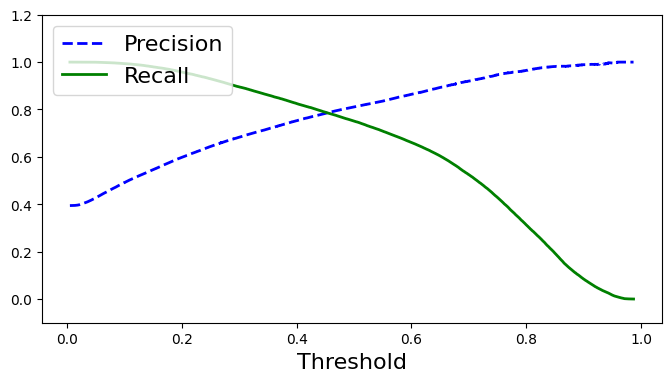

In [17]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_binary, y_test_scores)

plt.figure(figsize=(8, 4))

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

plt.xlabel("Threshold", fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.ylim([-0.1, 1.2])
plt.show()

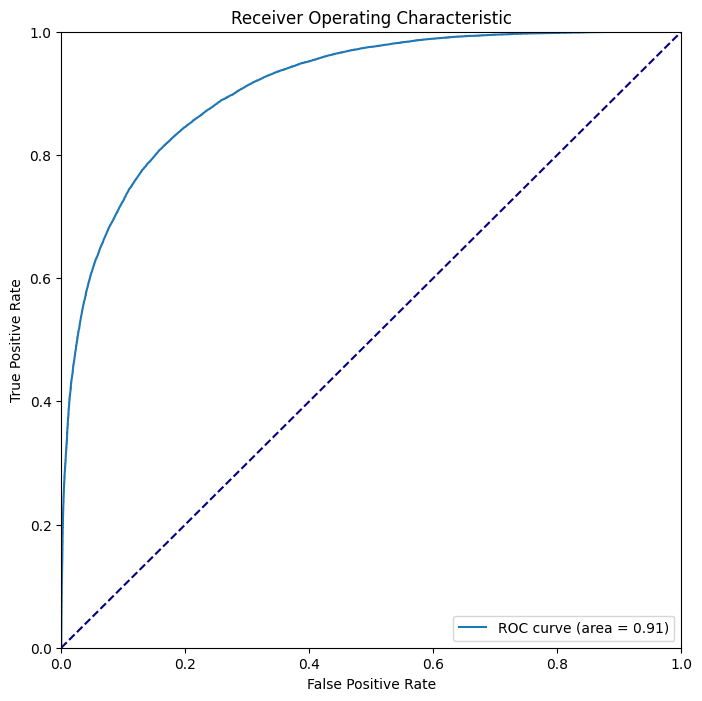

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

# Outras métricas para modelos de classificação são a curva ROC e a área sob a curva ROC (AUC)
# A curva ROC é um gráfico que mostra a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos
# A AUC é a área sob a curva ROC, e é uma métrica que varia entre 0.5 e 1, sendo 0.5 o valor de um modelo aleatório

# A taxa de verdadeiros positivos (TPR) é a razão entre o número de positivos classificados como positivos e o número total de positivos
# A taxa de falsos positivos (FPR) é a razão entre o número de negativos classificados como positivos e o número total de negativos

fpf, tpf, _ = roc_curve(y_test_binary, y_test_scores)
roc_auc = roc_auc_score(y_test_binary, y_test_scores)

plt.figure(figsize=(8, 8))
plt.plot(fpf, tpf, label=f'ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic')

plt.legend(loc='lower right')

plt.show()

Boa prova!